In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data = pd.read_csv("/content/filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1533281434105810946  1533022197324955655  2022-06-05 02:55:55 UTC   
1  1533281423892787200  1533281423892787200  2022-06-05 02:55:53 UTC   
2  1533281423682961410  1533022197324955655  2022-06-05 02:55:53 UTC   
3  1533281416598933504  1533281416598933504  2022-06-05 02:55:51 UTC   
4  1533281414363639810  1533281414363639810  2022-06-05 02:55:50 UTC   

         date      time  timezone              user_id         username  \
0  2022-06-05  02:55:55         0  1275824153363275777  boomer_longlens   
1  2022-06-05  02:55:53         0  1367501470556446726       oknw703213   
2  2022-06-05  02:55:53         0  1188159916910858240     brodahcrispy   
3  2022-06-05  02:55:51         0            316905777        peterwr77   
4  2022-06-05  02:55:50         0  1502106121724563459       zedsignbot   

               name place  ... geo source user_rt_id user_rt retweet_id  \
0            Boomer   NaN  ... NaN    NaN

In [3]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [4]:
data = data[["username", "tweet", "language"]]

In [5]:
data["language"].value_counts()

en     8939
pt      435
it      145
und     116
in       65
ja       54
es       49
ru       38
ca       26
ur       17
el       16
tl       13
ar       12
hi       11
et        9
nl        8
zh        8
cs        6
de        5
ro        5
tr        4
pl        4
fi        4
th        4
fr        3
no        2
uk        2
ta        2
mr        2
eu        1
da        1
ko        1
kn        1
gu        1
si        1
pa        1
lt        1
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


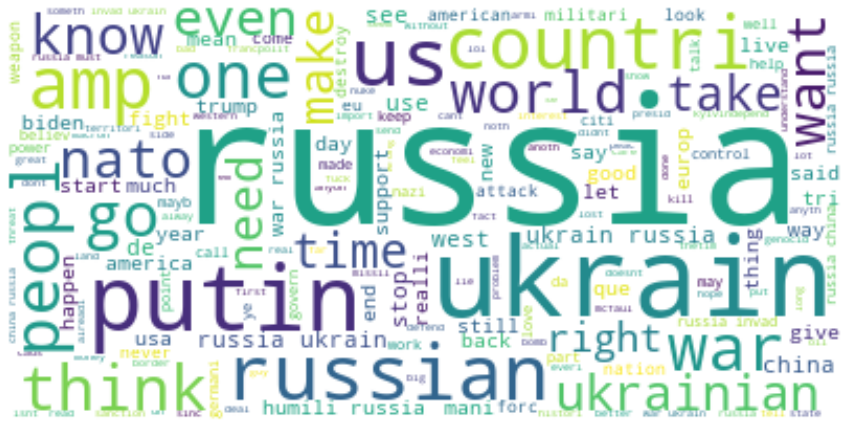

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
                                               tweet  Positive  Negative  \
0  thetim russia see may lose war dont know handl...     0.000     0.248   
1  報道機関は  『ウクライナへの侵攻』  侵攻ではなく【侵略】  ロシアは現代のナチス  北方...     0.000     0.504   
2  mesuryak  thetim russia  deploy strateg nuke u...     0.000     0.048   
3  new post ukrain war russia continu make slow p...     0.158     0.220   
4                          conclus russia run radish     0.000     0.000   

   Neutral  
0    0.752  
1    0.496  
2    0.952  
3    0.621  
4    1.000  


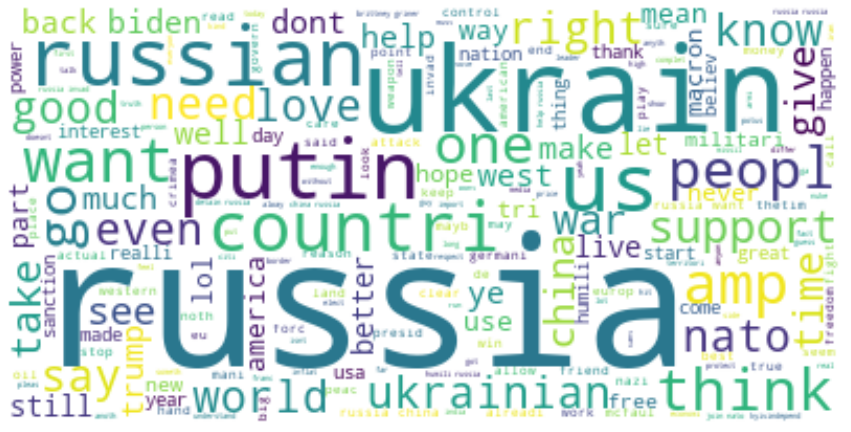

In [9]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

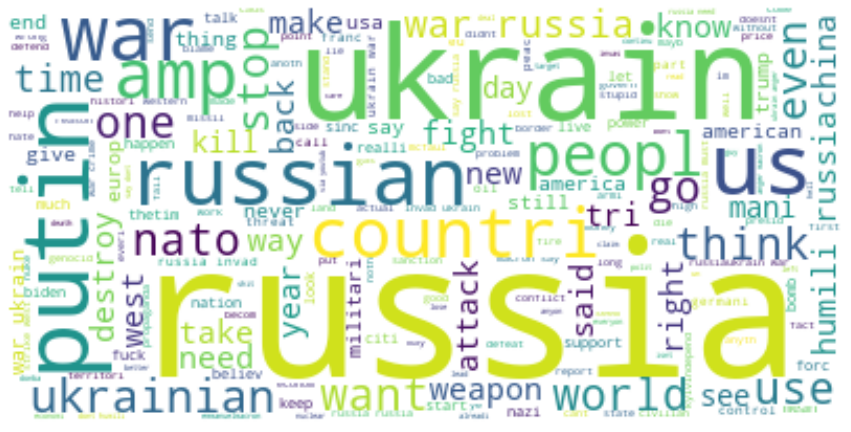

In [10]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()